# Descriptive Statistic
deskripsikan data, merangkum, menggunakan angka untuk menjelaskan arti dari data kita

## terminologi
- population vs sample
    - population adalah keseluruhan data yang terkait, yang mau dirangkum. contohnya, kalau kita mau bilang rata-rata tinggi badan "orang Indonesia" adalah ... maka population adalah seluruh orang Indonesia. termasuk semua umur, kedua gender, di semua daerah, yang sedang tinggal di luar negeri, dan lainnya.
    - sebagian dari population adalah sample. pastikan sample nya bisa merepresentasikan segala jenis sub-grup dari population.
- outlier
    - outlier adalah data yang beda sendiri.
    
# Jenis Descriptive Statistic

## Measure of central tendency (tengah nya data ini dimana)
- mean (rata-rata)
- median (data di tengah), quartile ke-2, percentile ke-50
- mode (modus)
    
## Measure of spread (seberapa tersebar data ini dari titik tengah tadi)

### quartile dan percentile
- quartile ke-1 = percentile ke-25
- quartile ke-2 = percentile ke-50 = median
- quartile ke-3 = percentile ke-75
- inter-quartile range IQR adalah Q3 - Q1
    - angka yang berada di > Q3 + 1.5 * IQR termasuk outlier
    - angka yang berada di < Q1 - 1.5 * IQR termasuk outlier

### standard deviation
1. untuk setiap titik data yang ada di dataset kita. contoh, kita punya data tinggi badan 100 orang berbeda. 
2. kita kurangi masing masing titik dengan rata-rata seluruh data.
3. hasil pengurangan kita kuadrat
4. hasil kuadrat kita jumlahkan semua
5. hasil penjumlahan kita bagi 99 (total 100 sample - 1 karena ini sample. kalau populasi, dibagi 100 full)
6. hasil bagi nya di akar.

### variance
standard deviation kuadrat

### range
titik data terbesar - titik data terkecil

### skewness
menjelaskan distribusi data nya berat di mana, apakah simetris/ tidak.

### kurtosis
menjelaskan buntut data banyak/ tidak. kalau banyak buntut (jauh dari tengah) berarti semakin banyak outlier.

### correlation
apakah ada hubungannya antara dua variable berbeda. misalnya tinggi dan berat badan.

In [1]:
# impor package yang akan digunakan
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats

# untuk visualisasi
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
# membuat dummy data
x = [8, 10, 17, 3, -5]
x_nan = [8, 10, 17, math.nan, 3, -5]

print(x, len(x))
print(x_nan, len(x_nan))

[8, 10, 17, 3, -5] 5
[8, 10, 17, nan, 3, -5] 6


# Measure of Central Tendency
## Mean
- normal
- weighted
- geometric
- harmonic

In [4]:
# hitung rata-rata x dan x_nan
# cara manual dengan python tanpa package tambahan
sum(x) / len(x)

6.6

In [6]:
sum(x_nan)/ len(x_nan)

nan

In [5]:
# pakai package statistics
statistics.mean(x)

6.6

In [7]:
statistics.mean(x_nan)

nan

In [8]:
# pakai numpy
y = np.array(x)
y_nan = np.array(x_nan)

print(np.mean(y))
print(np.mean(y_nan))

6.6
nan


In [11]:
np.nanmean(y_nan)

6.6

In [10]:
# pakai pandas
z = pd.Series(x)
z_nan = pd.Series(x_nan)

print(z.mean())
print(z_nan.mean())

6.6
6.6


## Weighted Mean
bayangkan ada 3 assignment dan 1 final project. assignment punya bobot 20% masing-masing. final project punya bobot 40%.   
tingkat kontribusi nilai assignment dan final project ke rata-rata nilai akhir berbeda.

In [15]:
andi = [ 50, 72, 85, 97]
bobot= [0.2,0.2,0.2,0.4]

# rata-rata biasa
statistics.mean(andi)

76

In [16]:
# weighted mean
# pakai numpy
andi_y = np.array(andi)
np.average(andi_y, weights=bobot)

80.2

## Harmonic Mean
jika kita punya angka 5, reciprocal dari 5 adalah 1/5   
1/5 = 0.2

jika kita punya angka 0.5, reciprocal dari 0.5 adalah 1/0.5
1/0.5 = 2   

harmonic mean menjumlah reciprocal dari setiap titik data, bagi jumlah data, dan hasilnya dihitung reciprocalnya lagi.   

contoh, kita punya perusahaan startup, dengan 4 karyawan:
- 1 ceo gaji 100jt, 3 karyawan lain gajinya 2, 4, dan 6 juta
- beda gaji nya jauh, ada 1 outlier yang sangat jauh sendiri
- kalau hitung rata-rata biasa, hasilnya akan ketarik jadi tinggi karena outlier tadi


teknik harmonic mean lebih cocok digunakan saat ada outlier seperti itu, hasilnya lebih akurat

In [17]:
gaji = [100, 2, 4, 6]

# rata-rata biasa
statistics.mean(gaji)

28

In [18]:
# hitung harmonic mean
# pakai package statistics
statistics.harmonic_mean(gaji)

4.316546762589928

In [19]:
# pakai package scipy.stats
scipy.stats.hmean(gaji)

4.316546762589928

## Geometric Mean
geometric mean digunakan saat kita mau hitung rata-rata untuk variable yang skalanya berbeda. contohnya kita punya 2 seller, kita mau beli produk yang sama dari salah satu seller ini. info:
- seller A punya 1112 rating, di 4.5 bintang
- seller B punya 741 rating, di 4.8 bintang

In [20]:
# dummy data
seller_A = [1112, 4.5]
seller_B = [741, 4.8]

# pakai scipy stats
print("skor seller A:", scipy.stats.gmean(seller_A))
print("skor seller B:", scipy.stats.gmean(seller_B))

skor seller A: 70.7389567353096
skor seller B: 59.63891347098803


## Median
angka harus diurutin dulu dari kecil ke besar.   
elemen tengah dari kumpulan data:
- kalau jumlah data ganjil, mislanya 5 titik data, maka median nya ada di posisi ke-3, titik ke (5+1)/2
- kalau jumlah data genap, misalnya 4 titik data, maka median nya ada di posisi antara 2 titik data, (titik ke 4/2 + titik ke 4/2 + 1) / 2

In [28]:
print(x)
x_sorted = np.sort(x)
print(x_sorted)

[8, 10, 17, 3, -5]
[-5  3  8 10 17]


In [29]:
# pakai package statistics, jumlah data ganjil
print(statistics.median_low(x_sorted))
print(statistics.median_high(x_sorted))
print(statistics.median(x_sorted))

8
8
8


In [30]:
x2 = np.sort([8, 10, 17, 3, -5, 10])
print(x2)

[-5  3  8 10 10 17]


In [31]:
# pakai package statistics, jumlah data genap
print(statistics.median_low(x2))
print(statistics.median_high(x2))
print(statistics.median(x2))

8
10
9.0


In [33]:
# pakai numpy
print(np.median(x))
print(np.median(x2))

8.0
9.0


In [35]:
# pakai pandas
print(pd.Series(x).median())
print(pd.Series(x2).median())

8.0
9.0


## Mode
mode, modus, adalah nilai yang paling sering muncul. contohnya, misalkan di sebuah pabrik ada 9 orang buruh, semua punya gaji 5juta. lalu ada CEO nya yang punya gaji 100juta, lalu karyawan dept lainnya 9 orang gajinya masing-masing di 10juta.

In [39]:
gaji = [5] * 9 + [10] * 9 + [100]
print(gaji)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 100]


In [40]:
# pakai package statistics
# kasi lihat modus pertama
statistics.mode(gaji)

5

In [42]:
# pakai scipy stats, 
# kasi lihat modus pertama dan count muncul brp kali
scipy.stats.mode(gaji)

ModeResult(mode=array([5]), count=array([9]))

In [45]:
# ambil mode nya saja, atau count nya saja dari hasil scipy stats
hasil = scipy.stats.mode(gaji)
print(hasil.mode)
print(hasil.count)

[5]
[9]


In [46]:
# pakai pandas
z = pd.Series(gaji)
print(z.mode())

0     5
1    10
dtype: int64


In [50]:
# bandingkan modus nya dengan mean dan median
print("median", z.median())
print("mode", scipy.stats.mode(gaji).mode)
print("mean", z.mean())

median 10.0
mode [5]
mean 12.368421052631579


# Measures of Variability
- variance
- standard deviation
- skewness
- percentiles
- ranges

## Variance
kita hanya melihat angkanya ini positive atau 0, ada penyebaran/ tidak. skala tidak ketahuan.


ddof = degrees of freedom. ddof=1 untuk sample, ddof=0 untuk population.

In [51]:
# pakai package statistics
statistics.variance(gaji)

456.5789473684211

In [54]:
# pakai numpy, untuk sample
print(np.var(gaji, ddof=1))

arr_g = np.array(gaji)
print(arr_g.var(ddof=1))

456.5789473684211
456.5789473684211


In [55]:
# pakai pandas
series_g = pd.Series(gaji)
print(series_g.var(ddof=1))

456.5789473684211


## Standard Deviation
variance di akar. kita bisa melihat skala penyebaran datanya.

In [62]:
# np.sqrt(variance)
np.sqrt(456.5789473684211)

21.36770805136623

In [57]:
# pakai statistics
statistics.stdev(gaji)

21.36770805136623

In [58]:
# pakai numpy, untuk sampel
print(np.std(gaji, ddof=1))
print(arr_g.std(ddof=1))

21.36770805136623
21.36770805136623


In [60]:
# pakai pandas
print(series_g.std(ddof=1))

21.36770805136623


## Skewness
seberapa asimetris data kita

In [63]:
# pakai scipy stats
scipy.stats.skew(gaji, bias=False)

4.259246734227951

In [64]:
# pakai pandas
series_g.skew()

4.259246734227952

## Percentiles
posisi elemen kita dibandingkan elemen lainnya ada di persentase ke berapa. Misalnya percentile ke-5, artinya 5% data di bawah titik ini, 95% data di atasnya.

### Quartiles
percentile spesial, percentile ke-25, ke-50, dan ke-75 punya nama lain yaitu quartiles, Q1, Q2, Q3.

In [66]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [67]:
# pakai statistics
statistics.quantiles(x, n=2, method='inclusive')

[8.0]

In [68]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [69]:
# cari percentiles pakai numpy
y = np.array(x)
np.percentile(y, 5)

-3.44

In [70]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [71]:
# ada juga np.nanpercentile() yang bisa handle missing values

In [72]:
# cari quartiles pakai numpy
np.quantile(y, [0.25, 0.50, 0.75])

array([ 0.1,  8. , 21. ])

In [73]:
# ada juga np.nanquantile() yang bisa handle missing values

In [74]:
# pakai pandas
z = pd.Series(x)
z.quantile([0.25, 0.50, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Range
perbedaan nilai tertinggi dengan nilai terendah

In [75]:
# pakai numpy
np.ptp(x)

46.0

In [76]:
# tanpa package
max(x) - min(x)

46.0

## Interquartile Range
perbedaan nilai Q3 dengan nilai Q1

In [78]:
# pakai statistics
q1, q2, q3 = statistics.quantiles(x, n=4, method='inclusive')

print(q3 - q1)

20.9


In [80]:
# pakai numpy
q1, q3 = np.percentile(x, [25, 75])
print(q3 - q1)

q1, q3 = np.quantile(x, [0.25, 0.75])
print(q3 - q1)

20.9
20.9


In [83]:
# pakai pandas
q1, q3 = z.quantile([0.25, 0.75])
print(q3 - q1)

20.9


## Summary
ada teknik tenik yang langsung menhitung banyak komponen dari descriptive statistics.

In [86]:
# misalnya pandas punya describe
hasil_describe = z.describe()
hasil_describe

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [87]:
# ambil 1 hal dari rangkuman describe
hasil_describe['max']

41.0

In [88]:
# cari range
hasil_describe['max'] - hasil_describe['min']

46.0

In [89]:
# cari interquartile range
hasil_describe['75%'] - hasil_describe['25%']

20.9

In [90]:
# pakai scipy stats describe
# untuk sample
hasil_describe2 = scipy.stats.describe(y, ddof=1, bias=False)
hasil_describe2

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

- nobs = count
- minmax = (min, max)
- mean
- variance
- skewness
- kurtosis

In [93]:
# misal kita mau cari range
minmax = hasil_describe2.minmax
minmax[1] - minmax[0]

46.0

In [94]:
# kalau mau cari standard deviation
np.sqrt(hasil_describe2.variance)

15.12454774346805

In [95]:
hasil_describe2.variance**0.5

15.12454774346805

# Measure of Correlation between Pairs of Data
kita bukan melihat 1 set data lagi, tapi 2 set data. Apakah ada hubungan antara 2 set data? correlation

Text(0, 0.5, 'y')

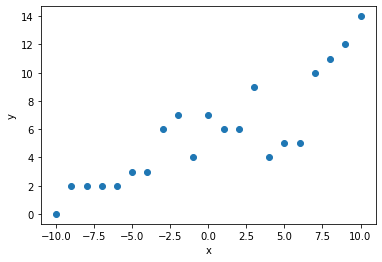

In [97]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

## Covariance

In [99]:
# pakai numpy, dapat covariance matrix
cov_matrix = np.cov(x, y)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [100]:
cov_matrix = np.cov(y, x)
cov_matrix

array([[13.91428571, 19.95      ],
       [19.95      , 38.5       ]])

In [101]:
covariance = cov_matrix[0,1]
# covariance = cov_matrix[1,0]

print(covariance)

19.95


## Correlation Coefficient

In [104]:
# pakai numpy
matrix = np.corrcoef(x, y)
print(matrix)
print()
print("r:", matrix[0,1])

[[1.         0.86195001]
 [0.86195001 1.        ]]

r: 0.8619500056316061


In [106]:
# pakai scipy stats
r, p = scipy.stats.pearsonr(x, y)
print("r:", r)

r: 0.8619500056316061


In [107]:
# bisa juga ambil dari scipy stats linregress
hasil_regression = scipy.stats.linregress(x, y)
hasil_regression

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [108]:
print(hasil_regression.rvalue)

0.861950005631606


In [110]:
# pakai pandas
series_x = pd.Series(x)
series_y = pd.Series(y)

print(series_x.corr(series_y))
print(series_y.corr(series_x))

0.8619500056316061
0.861950005631606
